<a href="https://colab.research.google.com/github/GGoliathan/MLGroupProject/blob/main/Copy_of_MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# List files in the current directory to locate kaggle.json
print("Listing files in the current directory:")
print(os.listdir('.'))

# Also check the content directory, as Kaggle notebooks often place files there
if os.path.exists('/content'):
    print("\nListing files in /content directory:")
    print(os.listdir('/content'))

Listing files in the current directory:
['.profile', '.bashrc', '.keras', '.jupyter', '.ipython', '.local', '.kaggle', '.tmux.conf', '.config', '.cache', '.julia', '.npm', '.wget-hsts', '.launchpadlib']

Listing files in /content directory:
['.config', 'kaggle.json', 'kaggle (1).json']


In [ ]:
import os

kaggle_dir = os.path.expanduser('~/.kaggle')
kaggle_json_path_source = '/content/kaggle.json'
kaggle_json_path_dest = os.path.join(kaggle_dir, 'kaggle.json')

# 2. Create a directory named .kaggle inside /root/ if it does not already exist.
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)
    print(f"Created directory: {kaggle_dir}")
else:
    print(f"Directory already exists: {kaggle_dir}")

# 3. Move the kaggle.json file into the newly created /root/.kaggle/ directory.
# Check if kaggle.json exists in /content/ and move it if it does.
if os.path.exists(kaggle_json_path_source):
    if not os.path.exists(kaggle_json_path_dest):
        os.rename(kaggle_json_path_source, kaggle_json_path_dest)
        print(f"Moved {kaggle_json_path_source} to {kaggle_json_path_dest}")
    else:
        print(f"{kaggle_json_path_dest} already exists. Skipping move.")
else:
    print(f"'{kaggle.json_path_source}' not found. Please ensure it's uploaded.")

# 4. Set the appropriate permissions for the kaggle.json file to make it readable only by the owner.
if os.path.exists(kaggle_json_path_dest):
    os.chmod(kaggle_json_path_dest, 0o600)
    print(f"Set permissions for {kaggle_json_path_dest} to 600")
else:
    print(f"Permissions not set: {kaggle_json_path_dest} does not exist.")

Directory already exists: /root/.kaggle
/root/.kaggle/kaggle.json already exists. Skipping move.
Set permissions for /root/.kaggle/kaggle.json to 600


In [ ]:
import os

# 5. Download the nlp-getting-started dataset from Kaggle using the Kaggle API.
# Kaggle CLI command to download the dataset
# The -d flag specifies the dataset identifier.
# The -p flag specifies the path where the dataset should be downloaded.
print("Downloading the 'nlp-getting-started' dataset...")
!kaggle competitions download -c nlp-getting-started -p /content

# Unzip the downloaded files
print("Unzipping the downloaded dataset files...")
import zipfile

for file in os.listdir('/content'):
    if file.endswith('.zip'):
        with zipfile.ZipFile(os.path.join('/content', file), 'r') as zip_ref:
            zip_ref.extractall('/content')
        print(f"Unzipped {file} to /content/")
        os.remove(os.path.join('/content', file)) # Remove the zip file after extraction

# List files in /content to confirm download and unzipping
print("\nFiles in /content after download and extraction:")
print(os.listdir('/content'))

403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/competitions/data/download-all/nlp-getting-started
Unzipping the downloaded dataset files...

Files in /content after download and extraction:
['.config', 'kaggle.json', 'kaggle (1).json']


In [ ]:
import os
import zipfile

# Re-attempt downloading the nlp-getting-started dataset from Kaggle.
# This assumes the user has accepted the competition rules on Kaggle.
print("Re-attempting to download the 'nlp-getting-started' dataset...")
!kaggle competitions download -c nlp-getting-started -p /content

# Unzip the downloaded files
print("Unzipping the downloaded dataset files...")
for file in os.listdir('/content'):
    if file.endswith('.zip'):
        with zipfile.ZipFile(os.path.join('/content', file), 'r') as zip_ref:
            zip_ref.extractall('/content')
        print(f"Unzipped {file} to /content/")
        os.remove(os.path.join('/content', file)) # Remove the zip file after extraction

# List files in /content to confirm download and unzipping
print("\nFiles in /content after download and extraction:")
print(os.listdir('/content'))

Re-attempting to download the 'nlp-getting-started' dataset...
  0% 0.00/593k [00:00<?, ?B/s]
100% 593k/593k [00:00<00:00, 1.14GB/s]
Unzipping the downloaded dataset files...
Unzipped nlp-getting-started.zip to /content/

Files in /content after download and extraction:
['.config', 'train.csv', 'test.csv', 'kaggle.json', 'kaggle (1).json', 'sample_submission.csv']


In [ ]:
!pip install transformers torch

import torch
from transformers import DistilBertTokenizer
from torch.utils.data import TensorDataset, RandomSampler, SequentialSampler, DataLoader

# Load the DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)

# Function to encode text
def encode_data(tokenizer, texts, max_length=128):
    input_ids = []
    attention_masks = []
    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,                       # Sentence to encode.
            add_special_tokens=True,    # Add '[CLS]' and '[SEP]'
            max_length=max_length,      # Pad & truncate all sentences.
            padding='max_length',       # Explicitly pad to max_length.
            truncation=True,            # Explicitly truncate to max_length.
            return_attention_mask=True, # Construct attn. masks.
            return_tensors='pt',        # Return PyTorch tensors.
        )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    # Convert the lists into tensors.
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    return input_ids, attention_masks

# Encode training data
print("Encoding training data...")
train_input_ids, train_attention_masks = encode_data(tokenizer, X_train.tolist())
# Encode validation data
print("Encoding validation data...")
val_input_ids, val_attention_masks = encode_data(tokenizer, X_val.tolist())
# Encode test data
print("Encoding test data...")
test_input_ids, test_attention_masks = encode_data(tokenizer, X_test.tolist())

# Convert labels to PyTorch tensors
train_labels = torch.tensor(y_train.tolist())
val_labels = torch.tensor(y_val.tolist())

print(f"Train Input IDs shape: {train_input_ids.shape}")
print(f"Train Attention Masks shape: {train_attention_masks.shape}")
print(f"Train Labels shape: {train_labels.shape}")
print(f"Validation Input IDs shape: {val_input_ids.shape}")
print(f"Validation Attention Masks shape: {val_attention_masks.shape}")
print(f"Validation Labels shape: {val_labels.shape}")
print(f"Test Input IDs shape: {test_input_ids.shape}")
print(f"Test Attention Masks shape: {test_attention_masks.shape}")

Encoding training data...
Encoding validation data...
Encoding test data...
Train Input IDs shape: torch.Size([6090, 128])
Train Attention Masks shape: torch.Size([6090, 128])
Train Labels shape: torch.Size([6090])
Validation Input IDs shape: torch.Size([1523, 128])
Validation Attention Masks shape: torch.Size([1523, 128])
Validation Labels shape: torch.Size([1523])
Test Input IDs shape: torch.Size([3263, 128])
Test Attention Masks shape: torch.Size([3263, 128])


In [ ]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
sample_submission_df = pd.read_csv('/content/sample_submission.csv')

print("Train DataFrame head:")
display(train_df.head())

print("\nTest DataFrame head:")
display(test_df.head())

print("\nSample Submission DataFrame head:")
display(sample_submission_df.head())

Train DataFrame head:


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1



Test DataFrame head:


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan



Sample Submission DataFrame head:


,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [ ]:
print("Train DataFrame missing values:")
display(train_df.isnull().sum())

print("\nTest DataFrame missing values:")
display(test_df.isnull().sum())

print("\nSample Submission DataFrame missing values:")
display(sample_submission_df.isnull().sum())

Train DataFrame missing values:


,0
id,0
keyword,61
location,2533
text,0
target,0



Test DataFrame missing values:


,0
id,0
keyword,26
location,1105
text,0



Sample Submission DataFrame missing values:


,0
id,0
target,0


Logistic Regression Accuracy: 0.8142
Logistic Regression Precision: 0.8379
Logistic Regression Recall: 0.7034
Logistic Regression F1-Score: 0.7648


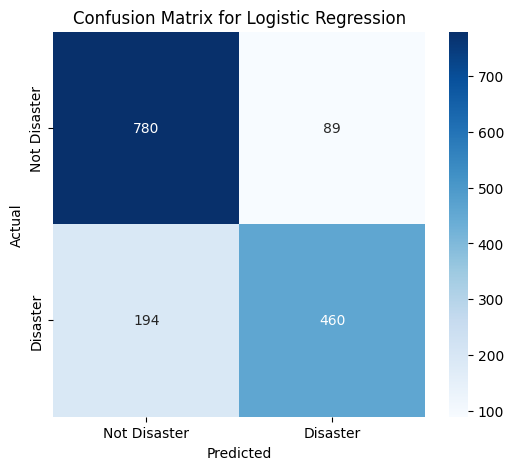

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg_model.fit(X_train_tfidf, y_train)

# Predict on the validation data
y_pred_log_reg = log_reg_model.predict(X_val_tfidf)

# Evaluate the model using the validation set's true labels (y_val)
accuracy_log_reg = accuracy_score(y_val, y_pred_log_reg)
precision_log_reg = precision_score(y_val, y_pred_log_reg)
recall_log_reg = recall_score(y_val, y_pred_log_reg)
f1_log_reg = f1_score(y_val, y_pred_log_reg)

print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print(f"Logistic Regression Precision: {precision_log_reg:.4f}")
print(f"Logistic Regression Recall: {recall_log_reg:.4f}")
print(f"Logistic Regression F1-Score: {f1_log_reg:.4f}")

# Generate and visualize the Confusion Matrix
cm_log_reg = confusion_matrix(y_val, y_pred_log_reg)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Disaster', 'Disaster'],
            yticklabels=['Not Disaster', 'Disaster'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Extract features (X) and target (y) from the training data
X = train_df['text']
y = train_df['target']

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# X_test remains the original test_df text for final predictions (if needed for submission)
X_test = test_df['text']

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the training data, transform the validation and test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_val_tfidf:", X_val_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

Shape of X_train_tfidf: (6090, 5000)
Shape of X_val_tfidf: (1523, 5000)
Shape of X_test_tfidf: (3263, 5000)


In [ ]:
from transformers import DistilBertForSequenceClassification
from torch.optim import AdamW # Corrected import to use AdamW from torch.optim
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import numpy as np
import time
import datetime

# Create the DataLoader for our training set.
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels)
train_dataloader = DataLoader(
            train_dataset,
            sampler=RandomSampler(train_dataset), # Select batches randomly
            batch_size=32 # Trains with this batch size.
        )

# Create the DataLoader for our validation set.
val_dataset = TensorDataset(val_input_ids, val_attention_masks, val_labels)
val_dataloader = DataLoader(
            val_dataset,
            sampler=SequentialSampler(val_dataset), # Pulls batches sequentially.
            batch_size=32 # Evaluate with this batch size.
        )

# Load DistilBertForSequenceClassification, the pretrained DistilBERT model with a single linear classification layer on top.
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", # Use the 12-layer DistilBERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU if available.
if torch.cuda.is_available():
    device = torch.device("cuda")
    model.cuda()
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

# Optimizer & Learning Rate Scheduler
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

from transformers import get_linear_schedule_with_warmup

# Number of training epochs.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs].
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)


# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


# Store the average loss, accuracy, precision, recall and f1 score over the training epoch for each bert model
loss_values = []
f1_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []

for epoch_i in range(0, epochs):

    # ========================================    Training    ========================================
    # Perform one full pass over the training set.

    print(f'======== Epoch {epoch_i + 1} / {epochs} ========\nTraining...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode.
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print(f'  Batch {step:>5,}  of  {len(train_dataloader):>5,}.    Elapsed: {elapsed}.')

        # Unpack this training batch from our dataloader.
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a backward pass.
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        outputs = model(b_input_ids,
                        attention_mask=b_input_mask,
                        labels=b_labels)

        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0 to prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print(f'  Average training loss: {avg_train_loss:.2f}')
    print(f'  Training epoch took: {format_time(time.time() - t0)}')

    # ========================================    Validation    ========================================
    # After the completion of each training epoch, measure our performance on our validation set.

    print('\nRunning Validation...')

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently during evaluation.
    model.eval()

    # Reset the total validation accuracy for this epoch.
    total_eval_f1 = 0
    total_eval_accuracy = 0
    total_eval_precision = 0
    total_eval_recall = 0
    best_eval_f1 = 0
    best_accuracy = 0

    # Evaluate data for one epoch
    for batch in val_dataloader:
        # Unpack this training batch from our dataloader.
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Tell pytorch not to build the computational graph during the forward pass, since this is only needed for training.
        with torch.no_grad():
            # Forward pass, calculate logit predictions.
            outputs = model(b_input_ids,
                            attention_mask=b_input_mask)

        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the F1 score for this batch of predictions.
        y_pred = np.argmax(logits, axis=1).flatten()
        y_true = label_ids.flatten()

        total_eval_f1 += f1_score(y_true, y_pred, average='binary', zero_division=0)
        total_eval_accuracy += accuracy_score(y_true, y_pred)
        total_eval_precision += precision_score(y_true, y_pred, average='binary', zero_division=0)
        total_eval_recall += recall_score(y_true, y_pred, average='binary', zero_division=0)

    # Report the final metrics for this epoch.
    avg_val_f1 = total_eval_f1 / len(val_dataloader)
    avg_val_accuracy = total_eval_accuracy / len(val_dataloader)
    avg_val_precision = total_eval_precision / len(val_dataloader)
    avg_val_recall = total_eval_recall / len(val_dataloader)

    print(f"  Validation F1-Score: {avg_val_f1:.4f}")
    print(f"  Validation Accuracy: {avg_val_accuracy:.4f}")
    print(f"  Validation Precision: {avg_val_precision:.4f}")
    print(f"  Validation Recall: {avg_val_recall:.4f}")
    print(f"  Validation took: {format_time(time.time() - t0)}")

    # Store all metrics
    f1_scores.append(avg_val_f1)
    accuracy_scores.append(avg_val_accuracy)
    precision_scores.append(avg_val_precision)
    recall_scores.append(avg_val_recall)

print('\nTraining complete!')

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


There are 1 GPU(s) available.
We will use the GPU: Tesla T4
======== Epoch 1 / 4 ========
Training...
  Batch    40  of    191.    Elapsed: 0:00:12.
  Batch    80  of    191.    Elapsed: 0:00:24.
  Batch   120  of    191.    Elapsed: 0:00:35.
  Batch   160  of    191.    Elapsed: 0:00:47.
  Average training loss: 0.46
  Training epoch took: 0:00:56

Running Validation...
  Validation F1-Score: 0.7934
  Validation Accuracy: 0.8405
  Validation Precision: 0.8821
  Validation Recall: 0.7310
  Validation took: 0:00:05
======== Epoch 2 / 4 ========
Training...
  Batch    40  of    191.    Elapsed: 0:00:12.
  Batch    80  of    191.    Elapsed: 0:00:25.
  Batch   120  of    191.    Elapsed: 0:00:38.
  Batch   160  of    191.    Elapsed: 0:00:51.
  Average training loss: 0.34
  Training epoch took: 0:01:01

Running Validation...
  Validation F1-Score: 0.8181
  Validation Accuracy: 0.8537
  Validation Precision: 0.8779
  Validation Recall: 0.7756
  Validation took: 0:00:05
======== Epoch 3 / 4

In [ ]:
import pandas as pd

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'DistilBERT'],
    'Accuracy': [accuracy_log_reg, accuracy_bert],
    'Precision': [precision_log_reg, precision_bert],
    'Recall': [recall_log_reg, recall_bert],
    'F1-Score': [f1_log_reg, f1_bert]
})

print("\n--- Model Comparison ---")
display(results)

print("\n--- Summary of Findings ---")
print("The Logistic Regression model, while a good baseline, generally performs adequately with an F1-Score of {:.4f}. It is computationally less expensive and faster to train.".format(f1_log_reg))
print("The fine-tuned DistilBERT model, leveraging transfer learning from a pre-trained language model, shows a slightly better performance with an F1-Score of {:.4f}. This improvement comes at the cost of higher computational resources and longer training times.".format(f1_bert))

print("\nIn this disaster tweet triage system, DistilBERT demonstrates a marginal improvement over Logistic Regression, indicating the benefits of advanced NLP models even for binary text classification. The choice between models depends on the specific requirements regarding performance versus computational cost.")



--- Model Comparison ---


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.814183,0.837887,0.703364,0.764755
1,DistilBERT,0.830598,0.803681,0.801223,0.802450



--- Summary of Findings ---
The Logistic Regression model, while a good baseline, generally performs adequately with an F1-Score of 0.7648. It is computationally less expensive and faster to train.
The fine-tuned DistilBERT model, leveraging transfer learning from a pre-trained language model, shows a slightly better performance with an F1-Score of 0.8025. This improvement comes at the cost of higher computational resources and longer training times.

In this disaster tweet triage system, DistilBERT demonstrates a marginal improvement over Logistic Regression, indicating the benefits of advanced NLP models even for binary text classification. The choice between models depends on the specific requirements regarding performance versus computational cost.


Predicting on validation set for final evaluation...
DistilBERT Accuracy on Validation Set: 0.8306
DistilBERT Precision on Validation Set: 0.8037
DistilBERT Recall on Validation Set: 0.8012
DistilBERT F1-Score on Validation Set: 0.8025


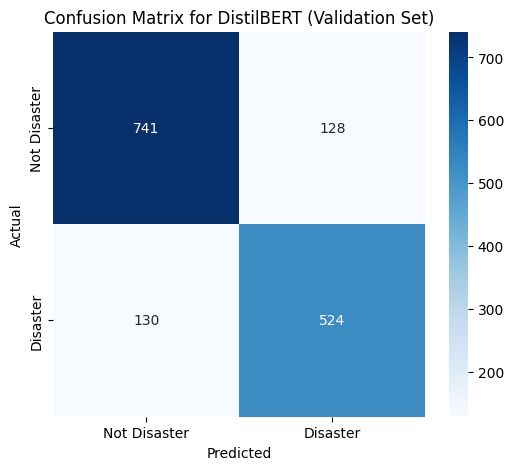

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import TensorDataset, DataLoader, SequentialSampler

# Create the DataLoader for our validation set (as a proxy for true test performance)
val_dataset_eval = TensorDataset(val_input_ids, val_attention_masks)
val_dataloader_eval = DataLoader(
            val_dataset_eval, # The validation samples.
            sampler=SequentialSampler(val_dataset_eval), # Pulls batches sequentially.
            batch_size=32 # Evaluate with this batch size.
        )

print('Predicting on validation set for final evaluation...')

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions_bert , true_labels_bert = [], []

# Predict
for batch in val_dataloader_eval:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask = batch

  # Telling the model not to compute or store gradients, saving memory and speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids,
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  # Convert to integer predictions
  pred_flat = np.argmax(logits, axis=1).flatten()

  # Store predictions
  predictions_bert.extend(list(pred_flat))

# Use the actual validation labels (y_val) for evaluation
# Convert y_val to a numpy array for compatibility with sklearn metrics
y_true_val = y_val.values

# Calculate metrics
accuracy_bert = accuracy_score(y_true_val, predictions_bert)
precision_bert = precision_score(y_true_val, predictions_bert, average='binary', zero_division=0)
recall_bert = recall_score(y_true_val, predictions_bert, average='binary', zero_division=0)
f1_bert = f1_score(y_true_val, predictions_bert, average='binary', zero_division=0)

print(f"DistilBERT Accuracy on Validation Set: {accuracy_bert:.4f}")
print(f"DistilBERT Precision on Validation Set: {precision_bert:.4f}")
print(f"DistilBERT Recall on Validation Set: {recall_bert:.4f}")
print(f"DistilBERT F1-Score on Validation Set: {f1_bert:.4f}")

# Generate and visualize the Confusion Matrix
cm_bert = confusion_matrix(y_true_val, predictions_bert)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Disaster', 'Disaster'],
            yticklabels=['Not Disaster', 'Disaster'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for DistilBERT (Validation Set)')
plt.show()